##Instalar libreria o paquetes

In [1]:
from google.colab import files
!pip install fuzzywuzzy
!pip install recordlinkage
!pip install scipy
!pip install pyod
!pip install combo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.9/926.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.1-py3-none-any.whl size=190074 sha256=4b4a95681beb93c01942bead76e1d91ce9b717b4ea526db7e4933b3e35d63865
  Stored in directory: /root/.cache/pip/wheels/a3/42/d7/48a53ffc1466bd63932f28583c64ebf442114db14a0bfa8c95
Successfully built pyod
  Preparing metadata (setup.py) ... done
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42860 sha256=7e534634c08c9feee36490e2e2ff04d7455e33cc8fc61aa5e57dfa0d2c0c22a5
  Stored in directory: /root/.cache/pip/wheels/7a/48/ff/0d6e1017d8bf3d844d332736fbb268dca767162779f93ff50a
Successfully built combo


##Importar librerias

In [2]:
import pandas as pd
import numpy as np
from time import process_time
import missingno as msno
import matplotlib.pyplot as plt
from scipy.io import arff
import sklearn as sk
import seaborn as sns
import fuzzywuzzy
import xlrd
import os

# Import models
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.lof import LOF

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_classif,chi2 , RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier

from mlxtend.plotting import plot_decision_regions


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importar conjunto de datos

In [4]:
X= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/2. Datos procesados/DataSet_Minar.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/2. Datos procesados/Target.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

##regresión logística
La regresión logística es un método de clasificación binaria y multiclase que puede ser eficaz y fácil de interpretar

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El porcentaje de precisión para la clasificación por regresión logística es: 38.395261173936454
Elapsed time during the whole program in seconds: 0.00011124600000300688
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.45      0.32      0.37       551
               Arroz       0.55      0.40      0.47       151
               Cacao       0.39      0.78      0.52       949
                Café       0.12      0.01      0.01       418
Caña panelera/azucar       0.67      0.01      0.02       251
                Maíz       0.00      0.00      0.00        93
                Mora       0.46      0.35      0.40       175
              Pastos       0.32      0.42      0.37       886
             Plátano       0.36      0.02      0.03       240

            accuracy                           0.38      3714
           macro avg       0.37      0.26      0.24      3714
        weighted avg       0.37      0.38      0.32      37

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


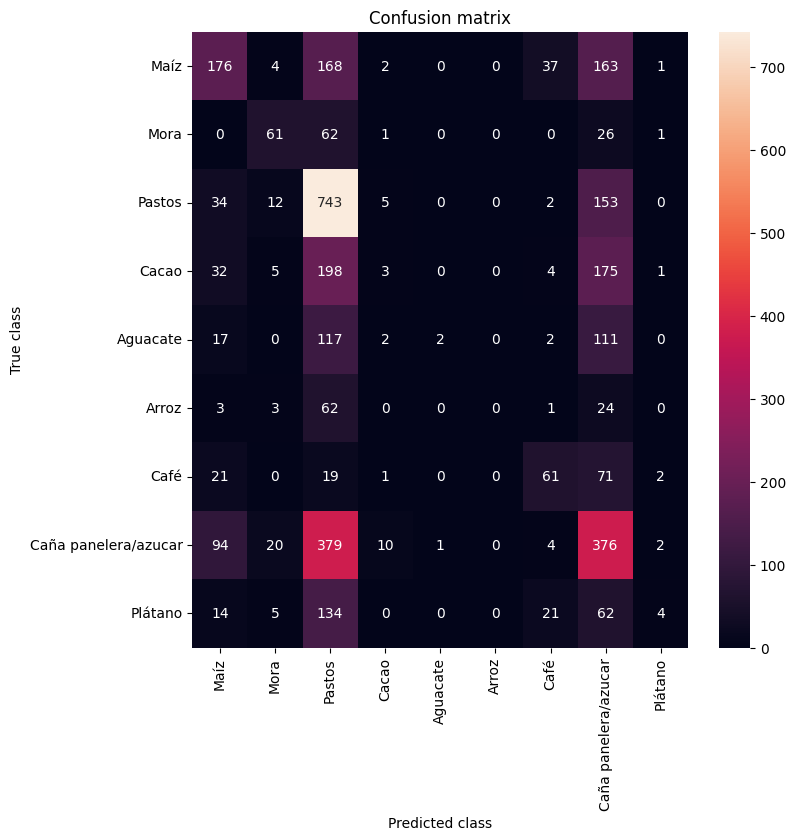

                      precision    recall  f1-score   support

            Aguacate       0.45      0.32      0.37       551
               Arroz       0.55      0.40      0.47       151
               Cacao       0.39      0.78      0.52       949
                Café       0.12      0.01      0.01       418
Caña panelera/azucar       0.67      0.01      0.02       251
                Maíz       0.00      0.00      0.00        93
                Mora       0.46      0.35      0.40       175
              Pastos       0.32      0.42      0.37       886
             Plátano       0.36      0.02      0.03       240

            accuracy                           0.38      3714
           macro avg       0.37      0.26      0.24      3714
        weighted avg       0.37      0.38      0.32      3714



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelo = LogisticRegression(max_iter=100000 )
#Fit the model
modelo.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
p=(sk.metrics.accuracy_score(y_pred, y_test))*100
print('El porcentaje de precisión para la clasificación por regresión logística es:',p )

t1_start = process_time()
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))


pred_y = modelo.predict(X_test)
mostrar_resultados(y_test, y_pred)

##Máquinas de Vectores de Soporte (SVM):
Las SVM son útiles cuando se busca una separación óptima entre clases en un espacio multidimensional. Pueden ser efectivas incluso en conjuntos de datos con alta dimensionalidad.

In [ ]:
#MSV
# Los hiperparámetros importantes son:
# - kernel: El núcleo utilizado para la clasificación (puede ser 'linear', 'poly', 'rbf', 'sigmoid', entre otros).
# - C: Parámetro de regularización. Controla la compensación entre maximizar el margen y minimizar el error de clasificación.
# - gamma: Parámetro de kernel (solo relevante para núcleos 'rbf', 'poly' y 'sigmoid').

SVC_model = SVC(kernel='rbf', gamma='auto')
SVC_model.fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)

p=(sk.metrics.accuracy_score(y_pred, y_test))*100
print('El porcentaje de precisión para la clasificación por árboles de decisión es:',p )

t1_start = process_time()
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El porcentaje de precisión para la clasificación por árboles de decisión es: 65.96661281637049
Elapsed time during the whole program in seconds: 4.196000000433742e-05
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.85      0.58      0.69       551
               Arroz       0.76      0.21      0.32       151
               Cacao       0.85      0.81      0.83       949
                Café       0.77      0.49      0.59       418
Caña panelera/azucar       0.78      0.39      0.52       251
                Maíz       0.48      0.14      0.22        93
                Mora       0.90      0.54      0.68       175
              Pastos       0.47      0.91      0.62       886
             Plátano       0.82      0.47      0.60       240

            accuracy                           0.66      3714
           macro avg       0.74      0.50      0.56      3714
        weighted avg       0.73      0.66      0.65      3714

##Random Forest
El clasificador Random Forest es un método de ensamblaje que combina múltiples árboles de decisión para mejorar el rendimiento y la generalización.

In [ ]:
#Random Forest
#Crea un clasificador Random Forest
# Los hiperparámetros importantes son:
# - n_estimators: El número de árboles en el bosque
# - random_state: Para hacer los resultados reproducibles
forest = RandomForestClassifier(criterion='gini', n_estimators=150,max_depth =50,random_state=1)

#Fit the model
forest.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = forest.predict(X_test)
p=(sk.metrics.accuracy_score(y_pred, y_test))*100
print('El porcentaje de precisión para la clasificación por Random Forest es:',p )

t1_start = process_time()
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

<ipython-input-33-bbd85cd1f6e7>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


El porcentaje de precisión para la clasificación por Random Forest es: 79.61766289714593
Elapsed time during the whole program in seconds: 4.3182000013075594e-05
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.82      0.78      0.80       551
               Arroz       0.77      0.77      0.77       151
               Cacao       0.80      0.92      0.86       949
                Café       0.80      0.74      0.77       418
Caña panelera/azucar       0.79      0.65      0.71       251
                Maíz       0.62      0.22      0.32        93
                Mora       0.87      0.81      0.84       175
              Pastos       0.76      0.82      0.79       886
             Plátano       0.83      0.73      0.77       240

            accuracy                           0.80      3714
           macro avg       0.79      0.72      0.74      3714
        weighted avg       0.79      0.80      0.79      3714



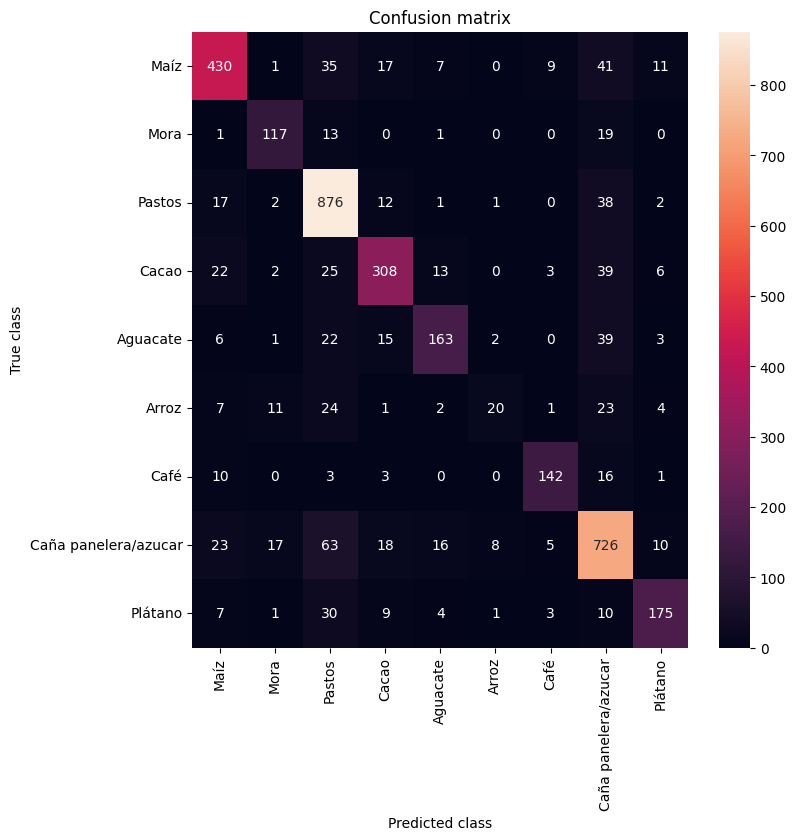

                      precision    recall  f1-score   support

            Aguacate       0.82      0.78      0.80       551
               Arroz       0.77      0.77      0.77       151
               Cacao       0.80      0.92      0.86       949
                Café       0.80      0.74      0.77       418
Caña panelera/azucar       0.79      0.65      0.71       251
                Maíz       0.62      0.22      0.32        93
                Mora       0.87      0.81      0.84       175
              Pastos       0.76      0.82      0.79       886
             Plátano       0.83      0.73      0.77       240

            accuracy                           0.80      3714
           macro avg       0.79      0.72      0.74      3714
        weighted avg       0.79      0.80      0.79      3714



In [ ]:
pred_y = forest.predict(X_test)
mostrar_resultados(y_test, y_pred)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/matrix.jpg")

##K-Nearest Neighbors (K-NN)
K-NN es un método simple que clasifica observaciones según la mayoría de las clases de sus vecinos más cercanos en el espacio de características.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


El porcentaje de precisión para la clasificación por Random Forest es: 75.47119009154551
Elapsed time during the whole program in seconds: 9.3837999884272e-05
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.77      0.76      0.77       551
               Arroz       0.72      0.74      0.73       151
               Cacao       0.82      0.89      0.85       949
                Café       0.66      0.68      0.67       418
Caña panelera/azucar       0.66      0.71      0.68       251
                Maíz       0.29      0.15      0.20        93
                Mora       0.79      0.82      0.81       175
              Pastos       0.78      0.75      0.76       886
             Plátano       0.70      0.62      0.66       240

            accuracy                           0.75      3714
           macro avg       0.69      0.68      0.68      3714
        weighted avg       0.75      0.75      0.75      3714



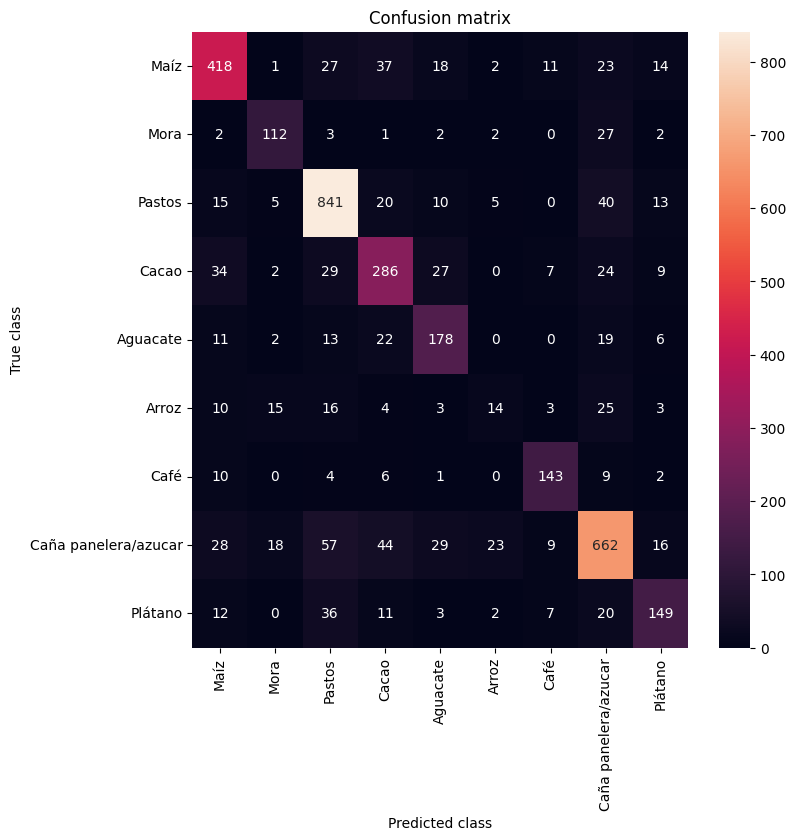

                      precision    recall  f1-score   support

            Aguacate       0.77      0.76      0.77       551
               Arroz       0.72      0.74      0.73       151
               Cacao       0.82      0.89      0.85       949
                Café       0.66      0.68      0.67       418
Caña panelera/azucar       0.66      0.71      0.68       251
                Maíz       0.29      0.15      0.20        93
                Mora       0.79      0.82      0.81       175
              Pastos       0.78      0.75      0.76       886
             Plátano       0.70      0.62      0.66       240

            accuracy                           0.75      3714
           macro avg       0.69      0.68      0.68      3714
        weighted avg       0.75      0.75      0.75      3714



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)
p=(sk.metrics.accuracy_score(y_pred, y_test))*100
print('El porcentaje de precisión para la clasificación por Random Forest es:',p )

t1_start = process_time()
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = classifier.predict(X_test)
mostrar_resultados(y_test, y_pred)

##Naïve Bayes
Los clasificadores Naïve Bayes son adecuados para problemas de clasificación de texto y datos con suposiciones de independencia condicional entre características.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)

In [ ]:
#Gaussian Naïve Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb_prediction = gnb.predict(X_test)
p=(sk.metrics.accuracy_score(gnb_prediction, y_test))*100
print('El porcentaje de precisión para la clasificación por Gaussian Naïve Bayes es:',p )

t1_start = process_time()
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = gnb.predict(X_test)
mostrar_resultados(y_test, y_pred)

El porcentaje de precisión para la clasificación por Gaussian Naïve Bayes es: 26.925148088314486
Elapsed time during the whole program in seconds: 8.518199999230092e-05
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.49      0.14      0.22       275
               Arroz       0.37      0.71      0.48        76
               Cacao       0.41      0.29      0.34       474
                Café       0.18      0.60      0.27       209
Caña panelera/azucar       0.15      0.06      0.08       126
                Maíz       0.17      0.07      0.09        46
                Mora       0.19      0.70      0.30        88
              Pastos       0.46      0.14      0.22       443
             Plátano       0.20      0.08      0.12       120

            accuracy                           0.27      1857
           macro avg       0.29      0.31      0.24      1857
        weighted avg       0.36      0.27      0.25      18

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Redes Neuronales Artificiales (ANN o Deep Learning)
Las redes neuronales pueden ser muy potentes en la clasificación, especialmente en problemas de alta complejidad. Puedes considerar usar arquitecturas como redes neuronales profundas (deep learning) si tienes acceso a grandes conjuntos de datos y recursos computacionales.

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Supongamos que X e y son tus datos, y necesitas realizar preprocesamiento, como codificar las etiquetas categóricas:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

num_classes = len(np.unique(y_encoded))
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Normaliza tus datos para mejorar el rendimiento de la red
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crea un modelo de red neuronal
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=16, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))  # num_classes es el número de clases en tus etiquetas

# Compila el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=500, batch_size=15, validation_data=(X_test, y_test))

# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss}, Precisión: {accuracy}')

# Ahora puedes usar este modelo para hacer predicciones en nuevos datos.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/500
578/578 [==============================] - 6s 8ms/step - loss: 1.7176 - accuracy: 0.3705 - val_loss: 1.5806 - val_accuracy: 0.4429
Epoch 2/500
578/578 [==============================] - 4s 7ms/step - loss: 1.5002 - accuracy: 0.4740 - val_loss: 1.4995 - val_accuracy: 0.4841
Epoch 3/500
578/578 [==============================] - 3s 4ms/step - loss: 1.4194 - accuracy: 0.5053 - val_loss: 1.4369 - val_accuracy: 0.5086
Epoch 4/500
578/578 [==============================] - 2s 4ms/step - loss: 1.3563 - accuracy: 0.5286 - val_loss: 1.3996 - val_accuracy: 0.5256
Epoch 5/500
578/578 [==============================] - 1s 3ms/step - loss: 1.3107 - accuracy: 0.5442 - val_loss: 1.3973 - val_accuracy: 0.5293
Epoch 6/500
578/578 [==============================] - 1s 3ms/step - loss: 1.2785 - accuracy: 0.5562 - val_loss: 1.3451 - val_accuracy: 0.5420
Epoch 7/500
578/578 [==============================] - 2s 3ms/step - loss: 1.2454 - accuracy: 0.5633 - val_loss: 1.3399 - val_accuracy: 0.5490

117/117 [==============================] - 1s 6ms/step


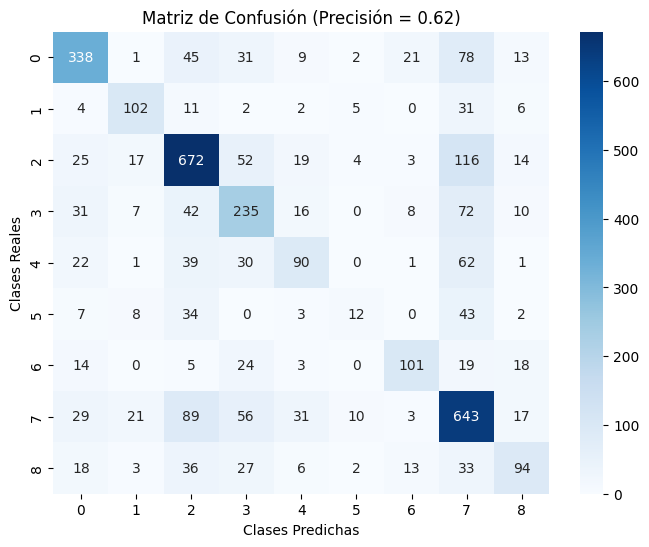

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un modelo entrenado llamado 'model' y un conjunto de prueba 'X_test' y 'y_test'

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las salidas en clases predichas

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_classes)

# Muestra la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.title(f'Matriz de Confusión (Precisión = {accuracy:.2f})')
plt.show()

##Clasificadores basados en árboles
Además de Random Forest, puedes considerar árboles de decisión simples y otros clasificadores basados en árboles, como CART o C4.5.

In [ ]:
#arboles de desicion
tree = DecisionTreeClassifier(criterion="gini",max_depth=None,random_state=1)
tree.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)
p=(sk.metrics.accuracy_score(y_pred, y_test))*100
print('El porcentaje de precisión para la clasificación por árboles de decisión es:',p )

t1_start = process_time()
t1_stop = process_time()
print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

El porcentaje de precisión para la clasificación por árboles de decisión es: 65.48196015078082
Elapsed time during the whole program in seconds: 4.353100000287213e-05
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.68      0.66      0.67       551
               Arroz       0.65      0.67      0.66       151
               Cacao       0.77      0.76      0.76       949
                Café       0.53      0.54      0.54       418
Caña panelera/azucar       0.52      0.51      0.52       251
                Maíz       0.30      0.28      0.29        93
                Mora       0.62      0.67      0.65       175
              Pastos       0.70      0.69      0.69       886
             Plátano       0.52      0.56      0.54       240

            accuracy                           0.65      3714
           macro avg       0.59      0.59      0.59      3714
        weighted avg       0.66      0.65      0.65      3714

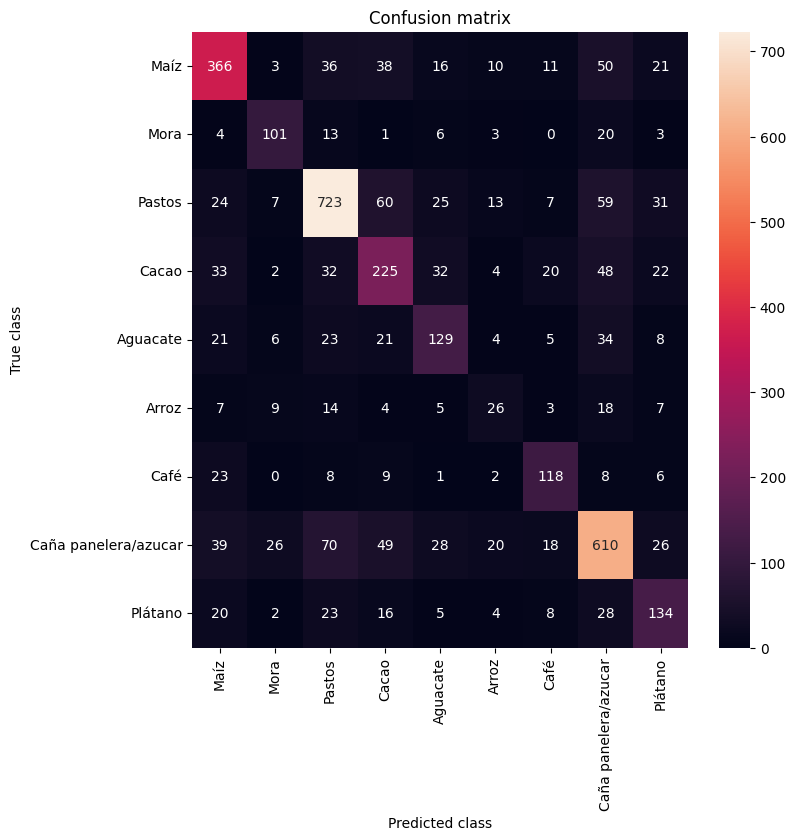

                      precision    recall  f1-score   support

            Aguacate       0.68      0.66      0.67       551
               Arroz       0.65      0.67      0.66       151
               Cacao       0.77      0.76      0.76       949
                Café       0.53      0.54      0.54       418
Caña panelera/azucar       0.52      0.51      0.52       251
                Maíz       0.30      0.28      0.29        93
                Mora       0.62      0.67      0.65       175
              Pastos       0.70      0.69      0.69       886
             Plátano       0.52      0.56      0.54       240

            accuracy                           0.65      3714
           macro avg       0.59      0.59      0.59      3714
        weighted avg       0.66      0.65      0.65      3714



In [ ]:
pred_y = tree.predict(X_test)
mostrar_resultados(y_test, y_pred)

## Prueba de hiperparametros

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Supongamos que tienes tus datos en X (características) y y (etiquetas)
# Asegúrate de tener tus datos y etiquetas cargados antes de ejecutar este código

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los valores que quieres probar
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 10, 20, 30 , 40 , 50 ]
n_estimators_values = [50, 100, 200, 300, 500, 1000]

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['criterion', 'max_depth', 'n_estimators', 'score'])

# Iterar sobre los diferentes valores
for criterion in criterion_values:
    for max_depth in max_depth_values:
        for n_estimators in n_estimators_values:
            # Crear el modelo de Random Forest con los parámetros actuales
            model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, n_estimators=n_estimators, random_state=42)

            # Entrenar el modelo
            model.fit(X_train, y_train)

            # Hacer predicciones en el conjunto de prueba
            y_pred = model.predict(X_test)

            # Calcular el score y almacenar los resultados en el DataFrame
            score = model.score(X_test, y_test)
            results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)

            # Imprimir el informe de clasificación
            print(f"Parámetros: criterion={criterion}, max_depth={max_depth}, n_estimators={n_estimators}")
            print(classification_report(y_test, y_pred))
            print("-" * 50)

# Imprimir el DataFrame con los resultados
print("\nResultados finales:")
print(results_df)


<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=None, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.84      0.77      0.80       368
               Arroz       0.78      0.81      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.75      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.66       181
                Maíz       0.80      0.16      0.27        73
                Mora       0.83      0.73      0.77       117
              Pastos       0.77      0.82      0.80       604
             Plátano       0.74      0.64      0.69       140

            accuracy                           0.79      2476
           macro avg       0.79      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=None, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.79      0.84      0.81       104
               Cacao       0.78      0.94      0.85       619
                Café       0.77      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.67       181
                Maíz       0.73      0.15      0.25        73
                Mora       0.81      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.74      0.65      0.69       140

            accuracy                           0.79      2476
           macro avg       0.78      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=None, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.80      0.84      0.82       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.77      0.77       270
Caña panelera/azucar       0.79      0.59      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.78      0.84      0.81       604
             Plátano       0.75      0.66      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=None, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.78      0.82      0.80       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.80      0.60      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.75      0.65      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=None, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.77      0.81       368
               Arroz       0.77      0.82      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.79      0.60      0.68       181
                Maíz       0.76      0.18      0.29        73
                Mora       0.82      0.72      0.76       117
              Pastos       0.78      0.83      0.81       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.79      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=None, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.77      0.83      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.78      0.59      0.67       181
                Maíz       0.71      0.16      0.27        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.77      0.83      0.80       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=10, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.69      0.76       368
               Arroz       0.78      0.80      0.79       104
               Cacao       0.69      0.94      0.80       619
                Café       0.70      0.68      0.69       270
Caña panelera/azucar       0.85      0.37      0.52       181
                Maíz       1.00      0.01      0.03        73
                Mora       0.79      0.58      0.67       117
              Pastos       0.68      0.79      0.74       604
             Plátano       0.75      0.57      0.65       140

            accuracy                           0.73      2476
           macro avg       0.79      0.60      0.63      2476
        weighted avg       0.75      0.73      0.71      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=10, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.85      0.69      0.76       368
               Arroz       0.78      0.78      0.78       104
               Cacao       0.70      0.94      0.80       619
                Café       0.72      0.68      0.70       270
Caña panelera/azucar       0.84      0.39      0.53       181
                Maíz       1.00      0.01      0.03        73
                Mora       0.79      0.58      0.67       117
              Pastos       0.69      0.81      0.74       604
             Plátano       0.77      0.59      0.67       140

            accuracy                           0.73      2476
           macro avg       0.79      0.61      0.63      2476
        weighted avg       0.75      0.73      0.71      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=10, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.85      0.69      0.76       368
               Arroz       0.78      0.78      0.78       104
               Cacao       0.70      0.93      0.80       619
                Café       0.72      0.69      0.70       270
Caña panelera/azucar       0.86      0.39      0.54       181
                Maíz       1.00      0.01      0.03        73
                Mora       0.77      0.60      0.67       117
              Pastos       0.68      0.80      0.74       604
             Plátano       0.78      0.55      0.64       140

            accuracy                           0.73      2476
           macro avg       0.79      0.61      0.63      2476
        weighted avg       0.75      0.73      0.71      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=10, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.87      0.70      0.77       368
               Arroz       0.80      0.77      0.78       104
               Cacao       0.69      0.93      0.80       619
                Café       0.70      0.69      0.70       270
Caña panelera/azucar       0.86      0.38      0.52       181
                Maíz       1.00      0.01      0.03        73
                Mora       0.80      0.60      0.68       117
              Pastos       0.67      0.80      0.73       604
             Plátano       0.77      0.56      0.65       140

            accuracy                           0.73      2476
           macro avg       0.80      0.60      0.63      2476
        weighted avg       0.75      0.73      0.71      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=10, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.87      0.69      0.77       368
               Arroz       0.79      0.78      0.78       104
               Cacao       0.70      0.94      0.80       619
                Café       0.70      0.68      0.69       270
Caña panelera/azucar       0.86      0.38      0.52       181
                Maíz       1.00      0.01      0.03        73
                Mora       0.80      0.60      0.69       117
              Pastos       0.67      0.80      0.73       604
             Plátano       0.78      0.56      0.66       140

            accuracy                           0.73      2476
           macro avg       0.80      0.60      0.63      2476
        weighted avg       0.75      0.73      0.71      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=10, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.87      0.70      0.77       368
               Arroz       0.79      0.78      0.78       104
               Cacao       0.69      0.94      0.80       619
                Café       0.70      0.69      0.69       270
Caña panelera/azucar       0.85      0.38      0.52       181
                Maíz       1.00      0.01      0.03        73
                Mora       0.80      0.60      0.69       117
              Pastos       0.68      0.80      0.74       604
             Plátano       0.78      0.56      0.66       140

            accuracy                           0.73      2476
           macro avg       0.80      0.61      0.63      2476
        weighted avg       0.75      0.73      0.71      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=20, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.84      0.74      0.79       368
               Arroz       0.80      0.81      0.80       104
               Cacao       0.78      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.80      0.56      0.66       181
                Maíz       0.85      0.15      0.26        73
                Mora       0.80      0.72      0.76       117
              Pastos       0.76      0.82      0.79       604
             Plátano       0.74      0.66      0.70       140

            accuracy                           0.78      2476
           macro avg       0.79      0.69      0.71      2476
        weighted avg       0.79      0.78      0.77      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=20, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.85      0.75      0.80       368
               Arroz       0.79      0.82      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.80      0.58      0.67       181
                Maíz       0.65      0.15      0.24        73
                Mora       0.80      0.74      0.77       117
              Pastos       0.77      0.84      0.80       604
             Plátano       0.76      0.66      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=20, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.78      0.82      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.79      0.60      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.74      0.77       117
              Pastos       0.77      0.83      0.80       604
             Plátano       0.77      0.68      0.72       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=20, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.87      0.76      0.81       368
               Arroz       0.79      0.82      0.80       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.78      0.58      0.67       181
                Maíz       0.76      0.18      0.29        73
                Mora       0.80      0.74      0.77       117
              Pastos       0.77      0.83      0.80       604
             Plátano       0.76      0.68      0.72       140

            accuracy                           0.79      2476
           macro avg       0.79      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=20, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.78      0.82      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.78      0.80      0.79       270
Caña panelera/azucar       0.79      0.58      0.67       181
                Maíz       0.81      0.18      0.29        73
                Mora       0.80      0.74      0.77       117
              Pastos       0.77      0.83      0.80       604
             Plátano       0.76      0.68      0.72       140

            accuracy                           0.79      2476
           macro avg       0.79      0.70      0.72      2476
        weighted avg       0.80      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=20, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.87      0.76      0.81       368
               Arroz       0.79      0.81      0.80       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.79      0.59      0.67       181
                Maíz       0.88      0.19      0.31        73
                Mora       0.81      0.74      0.78       117
              Pastos       0.77      0.84      0.80       604
             Plátano       0.76      0.68      0.72       140

            accuracy                           0.79      2476
           macro avg       0.80      0.70      0.73      2476
        weighted avg       0.80      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=30, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.84      0.77      0.80       368
               Arroz       0.78      0.81      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.75      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.66       181
                Maíz       0.80      0.16      0.27        73
                Mora       0.83      0.73      0.77       117
              Pastos       0.77      0.82      0.80       604
             Plátano       0.74      0.64      0.69       140

            accuracy                           0.79      2476
           macro avg       0.79      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=30, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.79      0.84      0.81       104
               Cacao       0.78      0.94      0.85       619
                Café       0.77      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.67       181
                Maíz       0.73      0.15      0.25        73
                Mora       0.81      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.74      0.65      0.69       140

            accuracy                           0.79      2476
           macro avg       0.78      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=30, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.80      0.84      0.82       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.77      0.77       270
Caña panelera/azucar       0.79      0.59      0.67       181
                Maíz       0.73      0.15      0.25        73
                Mora       0.79      0.73      0.76       117
              Pastos       0.78      0.84      0.81       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.79      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=30, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.79      0.82      0.80       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.80      0.59      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.81      0.72      0.76       117
              Pastos       0.78      0.84      0.81       604
             Plátano       0.76      0.65      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=30, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.77      0.81       368
               Arroz       0.77      0.82      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.80      0.60      0.69       181
                Maíz       0.81      0.18      0.29        73
                Mora       0.82      0.72      0.76       117
              Pastos       0.78      0.83      0.81       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.80      0.70      0.72      2476
        weighted avg       0.80      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=30, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.77      0.83      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.77      0.59      0.67       181
                Maíz       0.71      0.16      0.27        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=40, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.84      0.77      0.80       368
               Arroz       0.78      0.81      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.75      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.66       181
                Maíz       0.80      0.16      0.27        73
                Mora       0.83      0.73      0.77       117
              Pastos       0.77      0.82      0.80       604
             Plátano       0.74      0.64      0.69       140

            accuracy                           0.79      2476
           macro avg       0.79      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=40, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.79      0.84      0.81       104
               Cacao       0.78      0.94      0.85       619
                Café       0.77      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.67       181
                Maíz       0.73      0.15      0.25        73
                Mora       0.81      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.74      0.65      0.69       140

            accuracy                           0.79      2476
           macro avg       0.78      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=40, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.80      0.84      0.82       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.77      0.77       270
Caña panelera/azucar       0.79      0.59      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.78      0.84      0.81       604
             Plátano       0.75      0.66      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=40, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.78      0.82      0.80       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.80      0.60      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.75      0.65      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=40, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.77      0.81       368
               Arroz       0.77      0.82      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.79      0.60      0.68       181
                Maíz       0.76      0.18      0.29        73
                Mora       0.82      0.72      0.76       117
              Pastos       0.78      0.83      0.81       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.79      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=40, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.77      0.83      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.78      0.59      0.67       181
                Maíz       0.71      0.16      0.27        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.77      0.83      0.80       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=50, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.84      0.77      0.80       368
               Arroz       0.78      0.81      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.75      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.66       181
                Maíz       0.80      0.16      0.27        73
                Mora       0.83      0.73      0.77       117
              Pastos       0.77      0.82      0.80       604
             Plátano       0.74      0.64      0.69       140

            accuracy                           0.79      2476
           macro avg       0.79      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=50, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.79      0.84      0.81       104
               Cacao       0.78      0.94      0.85       619
                Café       0.77      0.78      0.77       270
Caña panelera/azucar       0.79      0.57      0.67       181
                Maíz       0.73      0.15      0.25        73
                Mora       0.81      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.74      0.65      0.69       140

            accuracy                           0.79      2476
           macro avg       0.78      0.69      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=50, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.80      0.84      0.82       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.77      0.77       270
Caña panelera/azucar       0.79      0.59      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.78      0.84      0.81       604
             Plátano       0.75      0.66      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=50, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.85      0.76      0.81       368
               Arroz       0.78      0.82      0.80       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.80      0.60      0.68       181
                Maíz       0.69      0.15      0.25        73
                Mora       0.80      0.72      0.76       117
              Pastos       0.78      0.83      0.80       604
             Plátano       0.75      0.65      0.70       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.71      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=50, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.77      0.81       368
               Arroz       0.77      0.82      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.79      0.60      0.68       181
                Maíz       0.76      0.18      0.29        73
                Mora       0.82      0.72      0.76       117
              Pastos       0.78      0.83      0.81       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.79      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=gini, max_depth=50, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.77      0.83      0.80       104
               Cacao       0.80      0.94      0.86       619
                Café       0.77      0.79      0.78       270
Caña panelera/azucar       0.78      0.59      0.67       181
                Maíz       0.71      0.16      0.27        73
                Mora       0.80      0.73      0.76       117
              Pastos       0.77      0.83      0.80       604
             Plátano       0.77      0.66      0.71       140

            accuracy                           0.79      2476
           macro avg       0.78      0.70      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=None, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.75      0.79       368
               Arroz       0.74      0.82      0.78       104
               Cacao       0.78      0.94      0.85       619
                Café       0.78      0.78      0.78       270
Caña panelera/azucar       0.79      0.61      0.69       181
                Maíz       0.54      0.18      0.27        73
                Mora       0.84      0.75      0.79       117
              Pastos       0.79      0.81      0.80       604
             Plátano       0.72      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.76      0.70      0.72      2476
        weighted avg       0.78      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=None, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.87      0.75      0.81       368
               Arroz       0.76      0.83      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.81      0.62      0.70       181
                Maíz       0.60      0.16      0.26        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.82      0.80       604
             Plátano       0.74      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.77      0.71      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=None, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.87      0.76      0.81       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.80      0.95      0.87       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.67      0.19      0.30        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=None, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.81      0.74      0.78       117
              Pastos       0.79      0.84      0.81       604
             Plátano       0.75      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=None, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.80      0.74      0.76       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.69      0.72       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.72      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=None, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.81      0.78       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.80      0.79       270
Caña panelera/azucar       0.79      0.62      0.69       181
                Maíz       0.72      0.18      0.29        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.80      0.83      0.81       604
             Plátano       0.77      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.79      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=10, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.70      0.77       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.74      0.94      0.82       619
                Café       0.71      0.71      0.71       270
Caña panelera/azucar       0.82      0.46      0.59       181
                Maíz       0.83      0.14      0.24        73
                Mora       0.79      0.65      0.71       117
              Pastos       0.72      0.81      0.76       604
             Plátano       0.77      0.64      0.70       140

            accuracy                           0.75      2476
           macro avg       0.78      0.65      0.68      2476
        weighted avg       0.76      0.75      0.74      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=10, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.85      0.71      0.78       368
               Arroz       0.77      0.80      0.78       104
               Cacao       0.73      0.94      0.82       619
                Café       0.72      0.71      0.71       270
Caña panelera/azucar       0.84      0.45      0.58       181
                Maíz       0.90      0.12      0.22        73
                Mora       0.81      0.64      0.71       117
              Pastos       0.72      0.82      0.77       604
             Plátano       0.78      0.64      0.71       140

            accuracy                           0.75      2476
           macro avg       0.79      0.65      0.68      2476
        weighted avg       0.77      0.75      0.74      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=10, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.86      0.71      0.78       368
               Arroz       0.78      0.80      0.79       104
               Cacao       0.73      0.94      0.82       619
                Café       0.72      0.72      0.72       270
Caña panelera/azucar       0.84      0.45      0.59       181
                Maíz       0.88      0.10      0.17        73
                Mora       0.81      0.64      0.71       117
              Pastos       0.72      0.81      0.77       604
             Plátano       0.76      0.65      0.70       140

            accuracy                           0.75      2476
           macro avg       0.79      0.65      0.67      2476
        weighted avg       0.77      0.75      0.74      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=10, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.85      0.71      0.77       368
               Arroz       0.77      0.83      0.80       104
               Cacao       0.73      0.94      0.82       619
                Café       0.72      0.72      0.72       270
Caña panelera/azucar       0.85      0.45      0.59       181
                Maíz       1.00      0.11      0.20        73
                Mora       0.81      0.66      0.73       117
              Pastos       0.73      0.82      0.77       604
             Plátano       0.79      0.64      0.70       140

            accuracy                           0.76      2476
           macro avg       0.81      0.65      0.68      2476
        weighted avg       0.77      0.76      0.74      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=10, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.85      0.71      0.78       368
               Arroz       0.76      0.81      0.78       104
               Cacao       0.73      0.94      0.82       619
                Café       0.71      0.74      0.72       270
Caña panelera/azucar       0.87      0.45      0.59       181
                Maíz       1.00      0.12      0.22        73
                Mora       0.80      0.65      0.72       117
              Pastos       0.74      0.82      0.77       604
             Plátano       0.80      0.63      0.70       140

            accuracy                           0.76      2476
           macro avg       0.81      0.65      0.68      2476
        weighted avg       0.77      0.76      0.74      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=10, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.86      0.71      0.78       368
               Arroz       0.77      0.82      0.79       104
               Cacao       0.72      0.94      0.82       619
                Café       0.72      0.74      0.73       270
Caña panelera/azucar       0.86      0.46      0.60       181
                Maíz       1.00      0.12      0.22        73
                Mora       0.82      0.68      0.74       117
              Pastos       0.73      0.81      0.77       604
             Plátano       0.82      0.64      0.72       140

            accuracy                           0.76      2476
           macro avg       0.81      0.66      0.69      2476
        weighted avg       0.78      0.76      0.75      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=20, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.77      0.80       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.80      0.79       270
Caña panelera/azucar       0.76      0.60      0.67       181
                Maíz       0.67      0.19      0.30        73
                Mora       0.85      0.75      0.80       117
              Pastos       0.79      0.81      0.80       604
             Plátano       0.75      0.67      0.71       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=20, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.85      0.77      0.81       368
               Arroz       0.76      0.83      0.79       104
               Cacao       0.80      0.94      0.86       619
                Café       0.78      0.80      0.79       270
Caña panelera/azucar       0.80      0.60      0.69       181
                Maíz       0.63      0.23      0.34        73
                Mora       0.84      0.73      0.78       117
              Pastos       0.78      0.82      0.80       604
             Plátano       0.77      0.69      0.73       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=20, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.86      0.77      0.81       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.78      0.59      0.67       181
                Maíz       0.65      0.18      0.28        73
                Mora       0.83      0.74      0.78       117
              Pastos       0.78      0.82      0.80       604
             Plátano       0.78      0.70      0.74       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.72      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=20, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.85      0.78      0.82       368
               Arroz       0.75      0.83      0.79       104
               Cacao       0.80      0.95      0.86       619
                Café       0.79      0.79      0.79       270
Caña panelera/azucar       0.81      0.60      0.69       181
                Maíz       0.71      0.21      0.32        73
                Mora       0.83      0.74      0.78       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.78      0.71      0.74       140

            accuracy                           0.80      2476
           macro avg       0.79      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=20, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.85      0.77      0.81       368
               Arroz       0.75      0.83      0.79       104
               Cacao       0.80      0.95      0.87       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.80      0.60      0.68       181
                Maíz       0.68      0.18      0.28        73
                Mora       0.83      0.74      0.78       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.77      0.69      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=20, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.86      0.77      0.81       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.80      0.94      0.87       619
                Café       0.79      0.79      0.79       270
Caña panelera/azucar       0.77      0.61      0.68       181
                Maíz       0.72      0.18      0.29        73
                Mora       0.82      0.76      0.79       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.71      0.74       140

            accuracy                           0.80      2476
           macro avg       0.79      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=30, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.75      0.79       368
               Arroz       0.74      0.82      0.78       104
               Cacao       0.78      0.94      0.85       619
                Café       0.78      0.78      0.78       270
Caña panelera/azucar       0.79      0.61      0.69       181
                Maíz       0.54      0.18      0.27        73
                Mora       0.84      0.75      0.79       117
              Pastos       0.79      0.81      0.80       604
             Plátano       0.72      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.76      0.70      0.72      2476
        weighted avg       0.78      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=30, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.87      0.75      0.81       368
               Arroz       0.76      0.83      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.81      0.62      0.70       181
                Maíz       0.60      0.16      0.26        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.82      0.80       604
             Plátano       0.74      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.77      0.71      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=30, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.87      0.76      0.81       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.80      0.95      0.87       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.67      0.19      0.30        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=30, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.81      0.74      0.78       117
              Pastos       0.79      0.84      0.81       604
             Plátano       0.75      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=30, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.80      0.74      0.76       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.69      0.72       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.72      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=30, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.81      0.78       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.80      0.79       270
Caña panelera/azucar       0.79      0.62      0.69       181
                Maíz       0.72      0.18      0.29        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.80      0.83      0.81       604
             Plátano       0.77      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.79      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=40, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.75      0.79       368
               Arroz       0.74      0.82      0.78       104
               Cacao       0.78      0.94      0.85       619
                Café       0.78      0.78      0.78       270
Caña panelera/azucar       0.79      0.61      0.69       181
                Maíz       0.54      0.18      0.27        73
                Mora       0.84      0.75      0.79       117
              Pastos       0.79      0.81      0.80       604
             Plátano       0.72      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.76      0.70      0.72      2476
        weighted avg       0.78      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=40, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.87      0.75      0.81       368
               Arroz       0.76      0.83      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.81      0.62      0.70       181
                Maíz       0.60      0.16      0.26        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.82      0.80       604
             Plátano       0.74      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.77      0.71      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=40, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.87      0.76      0.81       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.80      0.95      0.87       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.67      0.19      0.30        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=40, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.81      0.74      0.78       117
              Pastos       0.79      0.84      0.81       604
             Plátano       0.75      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=40, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.80      0.74      0.76       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.69      0.72       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.72      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=40, n_estimators=1000
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.81      0.78       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.80      0.79       270
Caña panelera/azucar       0.79      0.62      0.69       181
                Maíz       0.72      0.18      0.29        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.80      0.83      0.81       604
             Plátano       0.77      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.79      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=50, n_estimators=50
                      precision    recall  f1-score   support

            Aguacate       0.85      0.75      0.79       368
               Arroz       0.74      0.82      0.78       104
               Cacao       0.78      0.94      0.85       619
                Café       0.78      0.78      0.78       270
Caña panelera/azucar       0.79      0.61      0.69       181
                Maíz       0.54      0.18      0.27        73
                Mora       0.84      0.75      0.79       117
              Pastos       0.79      0.81      0.80       604
             Plátano       0.72      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.76      0.70      0.72      2476
        weighted avg       0.78      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=50, n_estimators=100
                      precision    recall  f1-score   support

            Aguacate       0.87      0.75      0.81       368
               Arroz       0.76      0.83      0.79       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.81      0.62      0.70       181
                Maíz       0.60      0.16      0.26        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.82      0.80       604
             Plátano       0.74      0.69      0.71       140

            accuracy                           0.79      2476
           macro avg       0.77      0.71      0.72      2476
        weighted avg       0.79      0.79      0.78      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=50, n_estimators=200
                      precision    recall  f1-score   support

            Aguacate       0.87      0.76      0.81       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.80      0.95      0.87       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.67      0.19      0.30        73
                Mora       0.81      0.75      0.78       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=50, n_estimators=300
                      precision    recall  f1-score   support

            Aguacate       0.87      0.77      0.82       368
               Arroz       0.75      0.82      0.78       104
               Cacao       0.79      0.94      0.86       619
                Café       0.78      0.79      0.79       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.81      0.74      0.78       117
              Pastos       0.79      0.84      0.81       604
             Plátano       0.75      0.70      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476

--------------------------------------------------


<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-8-13b81fe99107>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Parámetros: criterion=entropy, max_depth=50, n_estimators=500
                      precision    recall  f1-score   support

            Aguacate       0.86      0.76      0.81       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.86       619
                Café       0.78      0.79      0.78       270
Caña panelera/azucar       0.80      0.61      0.69       181
                Maíz       0.70      0.19      0.30        73
                Mora       0.80      0.74      0.76       117
              Pastos       0.79      0.83      0.81       604
             Plátano       0.76      0.69      0.72       140

            accuracy                           0.79      2476
           macro avg       0.78      0.71      0.72      2476
        weighted avg       0.79      0.79      0.79      2476

--------------------------------------------------
Parámetros: criterion=entropy, max_depth=50, n_estimators=1000
               

<ipython-input-8-13b81fe99107>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)


In [10]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los valores que quieres probar
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 10, 20, 30 , 40 , 50 ]
n_estimators_values = [50, 100, 200, 300, 500, 1000]

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['criterion', 'max_depth', 'n_estimators', 'score'])

# Iterar sobre los diferentes valores
for criterion in criterion_values:
    for max_depth in max_depth_values:
        for n_estimators in n_estimators_values:
            # Crear el modelo de Random Forest con los parámetros actuales
            model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, n_estimators=n_estimators, random_state=42)

            # Entrenar el modelo
            model.fit(X_train, y_train)

            # Hacer predicciones en el conjunto de prueba
            y_pred = model.predict(X_test)

            # Calcular el score y almacenar los resultados en el DataFrame
            score = model.score(X_test, y_test)
            results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)

# Imprimir el DataFrame con los resultados
print("\nResultados finales:")
print(results_df)


<ipython-input-10-e7106a7b73d0>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-10-e7106a7b73d0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)
<ipython-input-10-e7106a7b73d0>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-10-e7106a7b73d0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': m


Resultados finales:
   criterion max_depth n_estimators     score
0       gini      None           50  0.788368
1       gini      None          100  0.790792
2       gini      None          200  0.791330
3       gini      None          300  0.791061
4       gini      None          500  0.791061
..       ...       ...          ...       ...
67   entropy        50          100  0.790253
68   entropy        50          200  0.794292
69   entropy        50          300  0.793215
70   entropy        50          500  0.793215
71   entropy        50         1000  0.794023

[72 rows x 4 columns]


<ipython-input-10-e7106a7b73d0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators, 'score': score}, ignore_index=True)


In [11]:
results_df

,criterion,max_depth,n_estimators,score
0,gini,None,50,0.788368
1,gini,None,100,0.790792
2,gini,None,200,0.791330
3,gini,None,300,0.791061
4,gini,None,500,0.791061
...,...,...,...,...
67,entropy,50,100,0.790253
68,entropy,50,200,0.794292
69,entropy,50,300,0.793215
70,entropy,50,500,0.793215


## Evaluación del modelo con los hiperparametros ajustados

<ipython-input-5-21a2f9248eca>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


El porcentaje de precisión para la clasificación por Random Forest es: 80.12924071082391
Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.86      0.78      0.82       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.87       619
                Café       0.79      0.79      0.79       270
Caña panelera/azucar       0.78      0.61      0.68       181
                Maíz       0.67      0.16      0.26        73
                Mora       0.82      0.76      0.79       117
              Pastos       0.80      0.83      0.81       604
             Plátano       0.77      0.69      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476



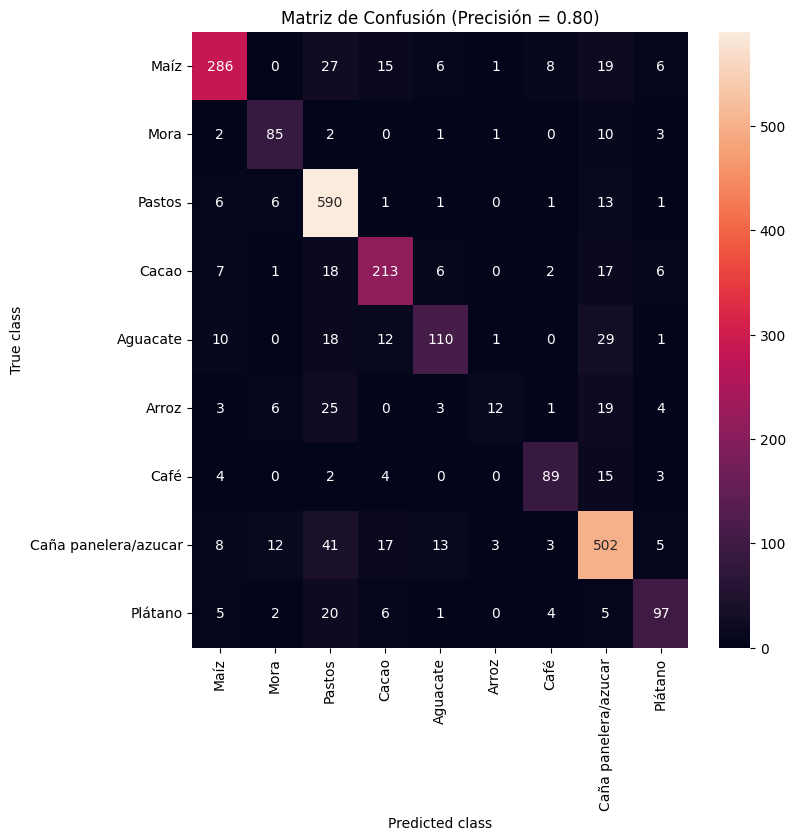

                      precision    recall  f1-score   support

            Aguacate       0.86      0.78      0.82       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.87       619
                Café       0.79      0.79      0.79       270
Caña panelera/azucar       0.78      0.61      0.68       181
                Maíz       0.67      0.16      0.26        73
                Mora       0.82      0.76      0.79       117
              Pastos       0.80      0.83      0.81       604
             Plátano       0.77      0.69      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestClassifier(criterion='entropy', n_estimators=300,max_depth =20)

#Fit the model
forest.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = forest.predict(X_test)
p=(sk.metrics.accuracy_score(y_pred, y_test))*100
print('El porcentaje de precisión para la clasificación por Random Forest es:',p )
accuracy = accuracy_score(y_test, y_pred)

print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

def mostrar_resultados(y_test, pred_y):
    LABELS=["Maíz", "Mora", "Pastos",'Cacao','Aguacate','Arroz', 'Café','Caña panelera/azucar', 'Plátano'];
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title(f'Matriz de Confusión (Precisión = {accuracy:.2f})')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = forest.predict(X_test)
mostrar_resultados(y_test, y_pred)

In [8]:
print("Informe de clasificación:")
print (classification_report(y_test, y_pred))

Informe de clasificación:
                      precision    recall  f1-score   support

            Aguacate       0.86      0.78      0.82       368
               Arroz       0.76      0.82      0.79       104
               Cacao       0.79      0.95      0.87       619
                Café       0.79      0.79      0.79       270
Caña panelera/azucar       0.78      0.61      0.68       181
                Maíz       0.67      0.16      0.26        73
                Mora       0.82      0.76      0.79       117
              Pastos       0.80      0.83      0.81       604
             Plátano       0.77      0.69      0.73       140

            accuracy                           0.80      2476
           macro avg       0.78      0.71      0.73      2476
        weighted avg       0.80      0.80      0.79      2476



In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir los números de divisiones que deseas probar
num_splits_values = [3, 5, 7, 10]

# Crear un DataFrame para almacenar los resultados
cv_results_df = pd.DataFrame(columns=['num_splits', 'score'])

# Iterar sobre los diferentes números de divisiones
for num_splits in num_splits_values:
    # Calcular los scores usando validación cruzada
    scores = cross_val_score(forest, X, y, cv=num_splits)

    # Almacenar los resultados en el DataFrame
    for fold, score in enumerate(scores):
        cv_results_df = cv_results_df.append({'num_splits': num_splits, 'fold': fold + 1, 'score': score}, ignore_index=True)

# Imprimir el informe con los resultados
print("\nResultados de la Validación Cruzada:")
print(cv_results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
<ipython-input-7-bdca571cb81d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version


Resultados de la Validación Cruzada:
    num_splits     score  fold
0          3.0  0.793505   1.0
1          3.0  0.798594   2.0
2          3.0  0.797818   3.0
3          5.0  0.803312   1.0
4          5.0  0.800081   2.0
5          5.0  0.791111   3.0
6          5.0  0.810909   4.0
7          5.0  0.808889   5.0
8          7.0  0.817976   1.0
9          7.0  0.796380   2.0
10         7.0  0.804299   3.0
11         7.0  0.796946   4.0
12         7.0  0.811652   5.0
13         7.0  0.825226   6.0
14         7.0  0.802602   7.0
15        10.0  0.820679   1.0
16        10.0  0.798869   2.0
17        10.0  0.789176   3.0
18        10.0  0.819871   4.0
19        10.0  0.795638   5.0
20        10.0  0.800485   6.0
21        10.0  0.820679   7.0
22        10.0  0.821342   8.0
23        10.0  0.821342   9.0
24        10.0  0.798707  10.0


<ipython-input-7-bdca571cb81d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append({'num_splits': num_splits, 'fold': fold + 1, 'score': score}, ignore_index=True)
<ipython-input-7-bdca571cb81d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append({'num_splits': num_splits, 'fold': fold + 1, 'score': score}, ignore_index=True)
<ipython-input-7-bdca571cb81d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append({'num_splits': num_splits, 'fold': fold + 1, 'score': score}, ignore_index=True)
<ipython-input-7-bdca571cb81d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers